In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [102]:
df = pd.read_excel("US_Superstore_Data.xls")

In [103]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [104]:
df.shape

(9994, 21)

In [105]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

# Sales & Profit Analysis

             Sales     Profit
Region                       
West     725457.82  108418.45
East     678781.24   91522.78
Central  501239.89   39706.36
South    391721.90   46749.43


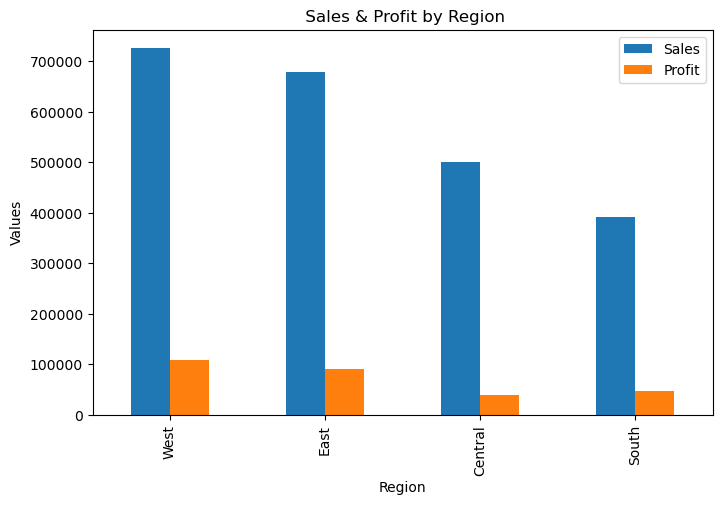

In [106]:
# Sales & Profit by Region
region_summary = df.groupby("Region")[["Sales", "Profit"]].sum().sort_values("Sales", ascending=False)
print(region_summary.round(2))

region_summary.plot(kind="bar", figsize=(8,5))
plt.title(" Sales & Profit by Region")
plt.ylabel("Values")
plt.savefig("region_summary.png", dpi=300, bbox_inches="tight")
plt.show()


                Sales    Profit
State                          
California  457687.63  76381.39
New York    310876.27  74038.55
Washington  138641.27  33402.65
Michigan     76269.61  24463.19
Virginia     70636.72  18597.95
Indiana      53555.36  18382.94
Georgia      49095.84  16250.04
Kentucky     36591.75  11199.70
Minnesota    29863.15  10823.19
Delaware     27451.07   9977.37


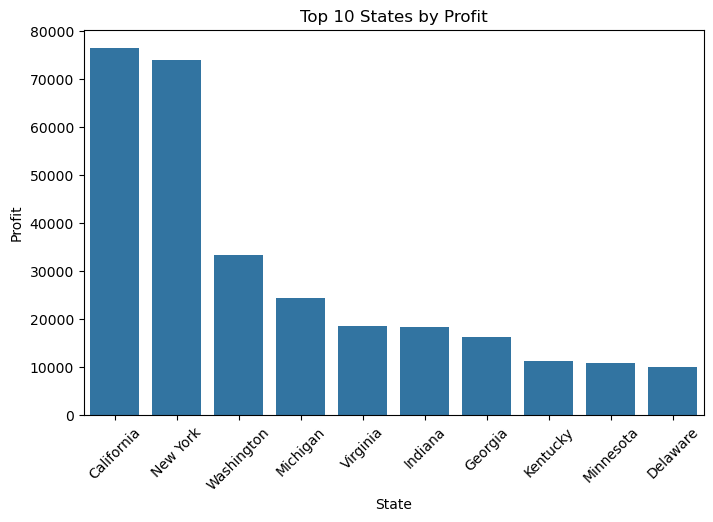

In [107]:
# Top 10 States by Profit
state_summary = df.groupby("State")[["Sales", "Profit"]].sum().sort_values("Profit", ascending=False).head(10)
print(state_summary.round(2))

plt.figure(figsize=(8,5))
sns.barplot(x=state_summary.index, y=state_summary["Profit"])
plt.xticks(rotation=45)
plt.title("Top 10 States by Profit")
plt.savefig("state_summary.png", dpi=300, bbox_inches="tight")
plt.show()

# Category & Sub-Category Performance

                     Sales     Profit
Category                             
Technology       836154.03  145454.95
Furniture        741999.80   18451.27
Office Supplies  719047.03  122490.80


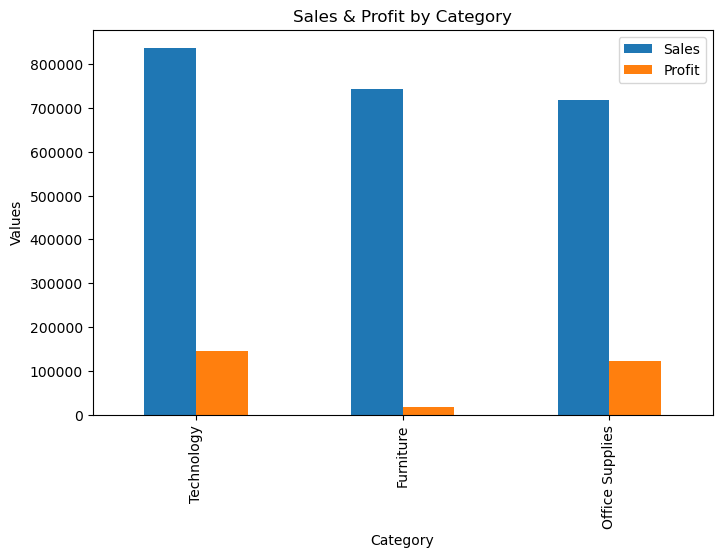

In [108]:
# Category-level
category_summary = df.groupby("Category")[["Sales", "Profit"]].sum().sort_values("Sales", ascending=False)
print(category_summary.round(2))

category_summary.plot(kind="bar", figsize=(8, 5))
plt.title("Sales & Profit by Category")
plt.ylabel("Values")
plt.savefig("category_summary.png", dpi=300, bbox_inches="tight")
plt.show()

                  Sales    Profit
Sub-Category                     
Copiers       149528.03  55617.82
Phones        330007.05  44515.73
Accessories   167380.32  41936.64
Paper          78479.21  34053.57
Binders       203412.73  30221.76
Chairs        328449.10  26590.17
Storage       223843.61  21278.83
Appliances    107532.16  18138.01
Furnishings    91705.16  13059.14
Envelopes      16476.40   6964.18
Art            27118.79   6527.79
Labels         12486.31   5546.25
Machines      189238.63   3384.76
Fasteners       3024.28    949.52
Supplies       46673.54  -1189.10
Bookcases     114880.00  -3472.56
Tables        206965.53 -17725.48


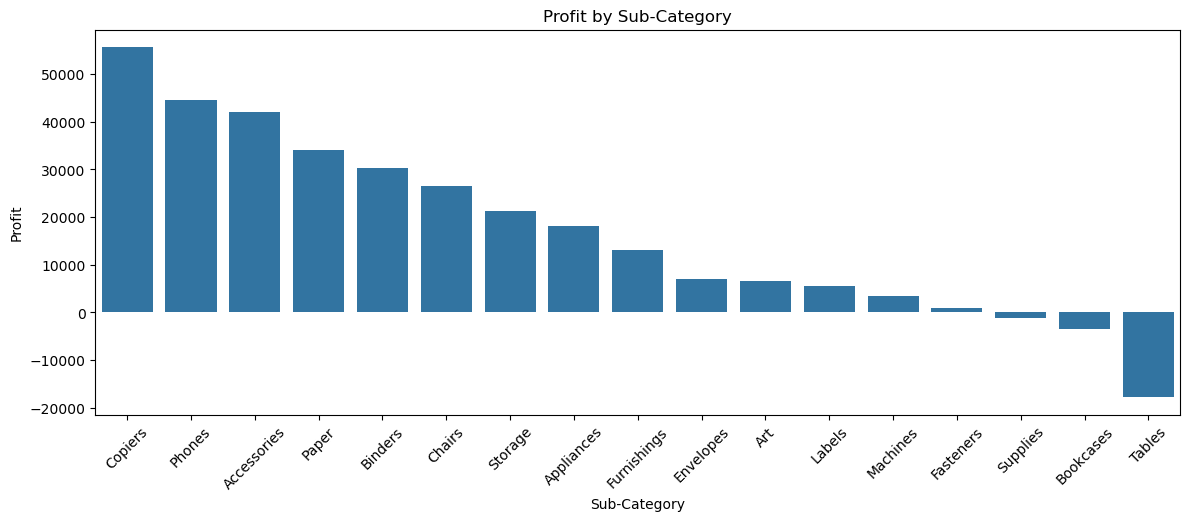

In [109]:
# Sub-category level
subcategory_summary = df.groupby("Sub-Category")[["Sales", "Profit"]].sum().sort_values("Profit", ascending=False)
print(subcategory_summary.round(2))

plt.figure(figsize=(14,5))
sns.barplot(x=subcategory_summary.index, y=subcategory_summary["Profit"])
plt.xticks(rotation=45)
plt.title("Profit by Sub-Category")
plt.savefig("subcategory_summary.png", dpi=300, bbox_inches="tight")
plt.show()

# Customer Segment Insights

                  Sales     Profit
Segment                           
Consumer     1161401.34  134119.21
Corporate     706146.37   91979.13
Home Office   429653.15   60298.68


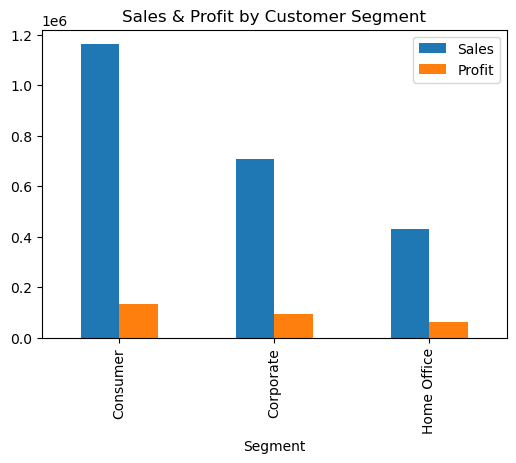

In [110]:
segemnt_summary = df.groupby("Segment")[["Sales", "Profit"]].sum()
print(segemnt_summary.round(2))

segemnt_summary.plot(kind="bar", figsize=(6,4))
plt.title("Sales & Profit by Customer Segment")
plt.savefig("segemnt_summary.png", dpi=300, bbox_inches="tight")
plt.show()

# Shipping & Delivery

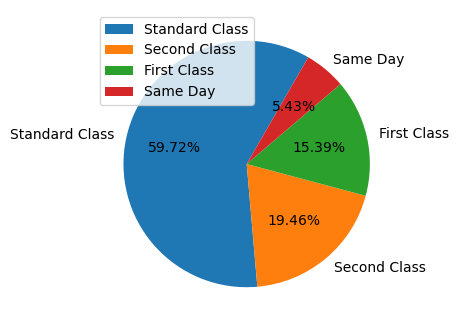

In [111]:
x = df["Ship Mode"].value_counts().index
y = df["Ship Mode"].value_counts().values
plt.figure(figsize=(5,4))
plt.pie(y, labels=x, startangle=60, autopct="%0.2f%%")
plt.legend(loc=2)
plt.savefig("ship_mode_pie.png", dpi=300, bbox_inches="tight")
plt.show()

# Time Series Analysis

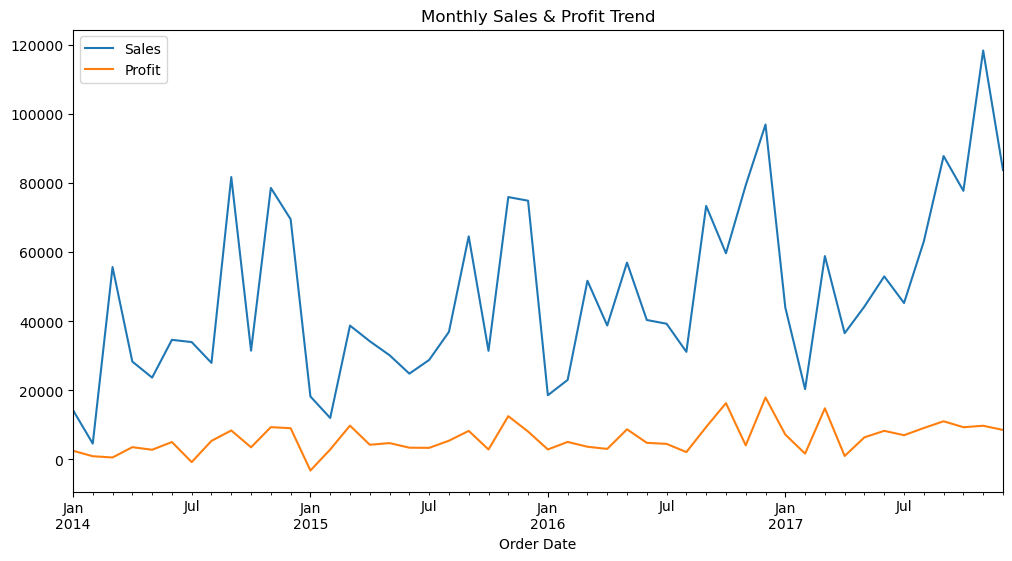

In [112]:
# Convert Order Date to datetime
df["Order Date"] = pd.to_datetime(df["Order Date"])

# Monthly trend
monthly_summary = df.groupby(df["Order Date"].dt.to_period("M"))[["Sales", "Profit"]].sum()

monthly_summary.plot(figsize=(12,6))
plt.title("Monthly Sales & Profit Trend")
plt.savefig("monthly_summary.png", dpi=300, bbox_inches="tight")
plt.show()


# Geographical Analysis

                    Sales    Profit
State                              
Texas           170188.05 -25729.36
Ohio             78258.14 -16971.38
Pennsylvania    116511.91 -15559.96
Illinois         80166.10 -12607.89
North Carolina   55603.16  -7490.91
Colorado         32108.12  -6527.86
Tennessee        30661.87  -5341.69
Arizona          35282.00  -3427.92
Florida          89473.71  -3399.30
Oregon           17431.15  -1190.47


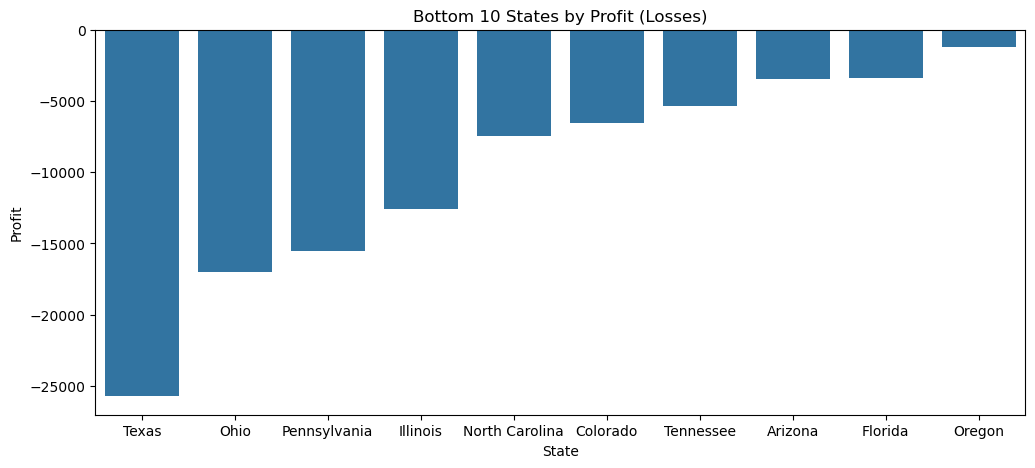

In [113]:
loss_states = df.groupby("State")[["Sales", "Profit"]].sum().sort_values("Profit").head(10)
print(loss_states.round(2))

plt.figure(figsize=(12,5))
sns.barplot(x=loss_states.index, y=loss_states["Profit"])

plt.title("Bottom 10 States by Profit (Losses)")
plt.savefig("loss_states.png", dpi=300, bbox_inches="tight")
plt.show()